In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [3]:
df = pd.read_csv("D:\\boston_housing\\BostonHousing.csv") 
print(df.head())
print(df.shape)

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
(506, 14)


In [4]:
print(" Missing Values:",df.isnull().sum())
df['rm'] = df['rm'].fillna(df['rm'].mean())
print("\nMissing values after imputation:\n", df.isnull().sum())

 Missing Values: crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

Missing values after imputation:
 crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [13]:
print("\n Descriptive statistics:\n", df.describe())


 Descriptive statistics:
              crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  501.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284341   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.705587   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.884000   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208000   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.625000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   


In [15]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]
# Removing outliers 
for col in df.select_dtypes(include=[np.number]).columns:
    if col != 'chas' and col != 'medv':
        df = remove_outliers(df, col)
print(df.shape)

(144, 14)


In [16]:
scaler = StandardScaler()
df_scaled = df.copy()
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print("Sample Scaled Data (StandardScaler):")
print(df_scaled.head())

Sample Scaled Data (StandardScaler):
       crim        zn     indus      chas       nox        rm       age  \
3 -1.112745 -0.538354 -1.673420 -0.258199 -0.646281  1.992800 -0.386153   
4 -0.719726 -0.538354 -1.673420 -0.258199 -0.646281  2.375465 -0.036926   
5 -1.139746 -0.538354 -1.673420 -0.258199 -0.646281  0.534048  0.150159   
6 -0.513573  0.427785  0.063181 -0.258199  0.757086 -0.539470  0.478599   
7  0.089242  0.427785  0.063181 -0.258199  0.757086 -0.128554  1.705049   

        dis       rad       tax   ptratio         b     lstat      medv  
3  1.233306 -1.573133 -1.181543  0.351384  0.221386 -1.774284  2.029383  
4  1.233306 -1.573133 -1.181543  0.351384  0.833885 -1.183342  2.611476  
5  1.233306 -1.573133 -1.181543  0.351384  0.083776 -1.213013  1.052300  
6  0.870304  0.584307  0.157567 -1.960594  0.483115  0.572174 -0.153463  
7  1.152486  0.584307  0.157567 -1.960594  0.833885  2.233733  0.719675  


In [17]:
normalizer = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numeric_cols] = normalizer.fit_transform(df[numeric_cols])
print("Sample Normalized Data (MinMaxScaler):")
print(df_normalized.head())


Sample Normalized Data (MinMaxScaler):
       crim        zn     indus  chas       nox        rm       age       dis  \
3  0.007798  0.000000  0.000000   0.0  0.278409  0.856686  0.455414  0.669629   
4  0.086810  0.000000  0.000000   0.0  0.278409  0.936068  0.544586  0.669629   
5  0.002370  0.000000  0.000000   0.0  0.278409  0.554076  0.592357  0.669629   
6  0.128255  0.277778  0.442457   0.0  0.653409  0.331380  0.676221  0.584692   
7  0.249445  0.277778  0.442457   0.0  0.653409  0.416622  0.989384  0.650719   

        rad       tax   ptratio         b     lstat      medv  
3  0.000000  0.121339  0.633333  0.843015  0.003831  0.792627  
4  0.000000  0.121339  0.633333  1.000000  0.134647  0.921659  
5  0.000000  0.121339  0.633333  0.807746  0.128079  0.576037  
6  0.666667  0.493724  0.050000  0.910097  0.523262  0.308756  
7  0.666667  0.493724  0.050000  1.000000  0.891078  0.502304  


In [19]:
X = df.drop('medv', axis=1)  # medv=Median Home Price
y = df['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = LinearRegression()

# Training
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [21]:
#evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error (MSE): {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.2f}")


Mean Squared Error (MSE): 4.50
R-squared (R²): 0.80


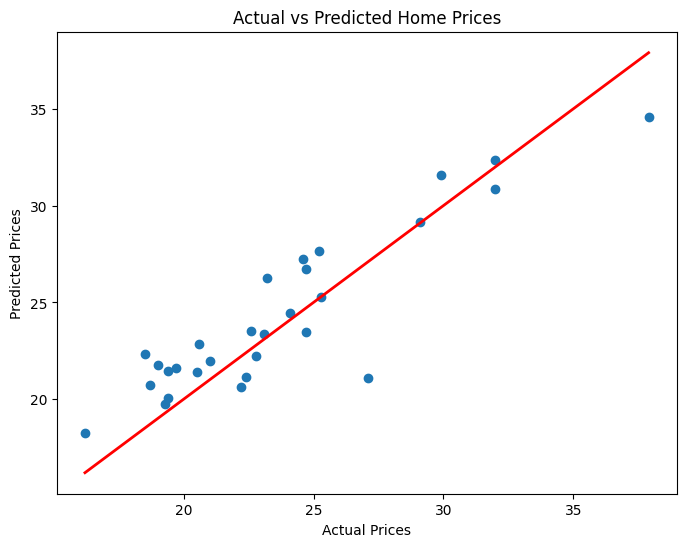

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title("Actual vs Predicted Home Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()